In [1]:
from modules import socrata_tools as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

__APP_TOKEN = '1UDvLapXXQY4bBsuwS1Xr7A1K'

## Descarregant les dades de Sòcrata

https://analisi.transparenciacatalunya.cat/Sector-P-blic/Contractaci-de-la-Generalitat-de-Catalunya-Contrac/ydq4-xy5b

In [2]:
dataset_id = 'ydq4-xy5b'
df = st.get_pandas_from_dataset_id(dataset_id, st.__get_socrata_client(__APP_TOKEN))

## Formatejar les dades

In [3]:
df['data_adjudicacio'] = pd.to_datetime(df['data_adjudicacio'], errors='coerce') # TODO - Rows with bad format will be deleted so we miss info
df['import_adjudicacio'] = pd.to_numeric(df['import_adjudicacio'], errors='coerce') # TODO - Rows with bad format will be deleted so we miss info
df.head(3)

,adjudicatari,agrupacio_organisme,anys_durada,codi_cpv,codi_expedient,contracte,data_adjudicacio,descripcio_expedient,dies_durada,exercici,import_adjudicacio,lot_desert,mesos_durada,numero_lot,organisme_contractant,procediment_adjudicacio,subjecte_ambit,tipus_contracte
0,TAKEDA FARMACEUTICA ESPAÑA S.A. UNIPERSONAL,DEPARTAMENT DE SALUT,0,NaN,947_CORTICOIDES,"SUBMINISTRAMENT DE CORTICOIDES SISTEMICS, MONO...",2015-12-31,"SUBMINISTRAMENT DE CORTICOIDES SISTEMICS, MONO...",0,2015,4562.50,N,0,1,Corporació Sanitària Parc Taulí de Sabadell,Menor,Departaments i Sector Públic de la Generalitat...,SUBMINISTRAMENTS
1,"SANOFI-AVENTIS, SA",DEPARTAMENT DE SALUT,0,33690000-3,6496_50579_T4_4,Fàrmacs Especifics,2017-10-01,Fàrmacs Especifics,0,2017,232.56,N,3,1,Corporació Sanitària Parc Taulí de Sabadell,Menor,Departaments i Sector Públic de la Generalitat...,3. SUBMINISTRAMENTS
2,"ABBOTT LABORATORIES, SA",DEPARTAMENT DE SALUT,0,33680000-0,4050267670,COMPRA DE FARMACIA,2018-04-13,COMPRA DE FARMACIA,1,2018,179.98,N,0,1,Institut Català de la Salut (ICS) Tarragona Ho...,Menor,Departaments i Sector Públic de la Generalitat...,3. SUBMINISTRAMENTS


## Netejar les dades

In [4]:
# La tipologia de contracte està duplicada i en formats diferents
replace_dict = {
    '1. OBRES': 'OBRES', 'OBRES':'OBRES',
    '2. GESTIÓ DE SERVEI PÚBLIC': 'GESTIÓ DE SERVEI PÚBLIC', 'GESTIÓ DE SERVEI PÚBLIC':'GESTIÓ DE SERVEI PÚBLIC',
    '3. SUBMINISTRAMENTS': 'SUBMINISTRAMENTS', 'SUBMINISTRAMENTS':'SUBMINISTRAMENTS',
    '5. SERVEIS':'SERVEIS', 'SERVEIS': 'SERVEIS',
    '6. ADMINISTRATIU ESPECIAL':'ADMINISTRATIU ESPECIAL', 'ADMINISTRATIU ESPECIAL': 'ADMINISTRATIU ESPECIAL'    
}

df['tipus_contracte'] = df['tipus_contracte'].map(replace_dict)

# La hi ha empreses amb diferents noms

df.loc[df['adjudicatari'] == 'SERVEIS, OBRES I MANTENIMENT, SL', 'adjudicatari'] = 'SERVEIS OBRES I MANTENIMENT, SL'

df['tipus_contracte'] = df['tipus_contracte'].map(replace_dict)


### Contractes de obres

In [5]:
df_obres = df.loc[(df['tipus_contracte'].isin(['OBRES']))]

Text(0.5, 1.0, '2019')

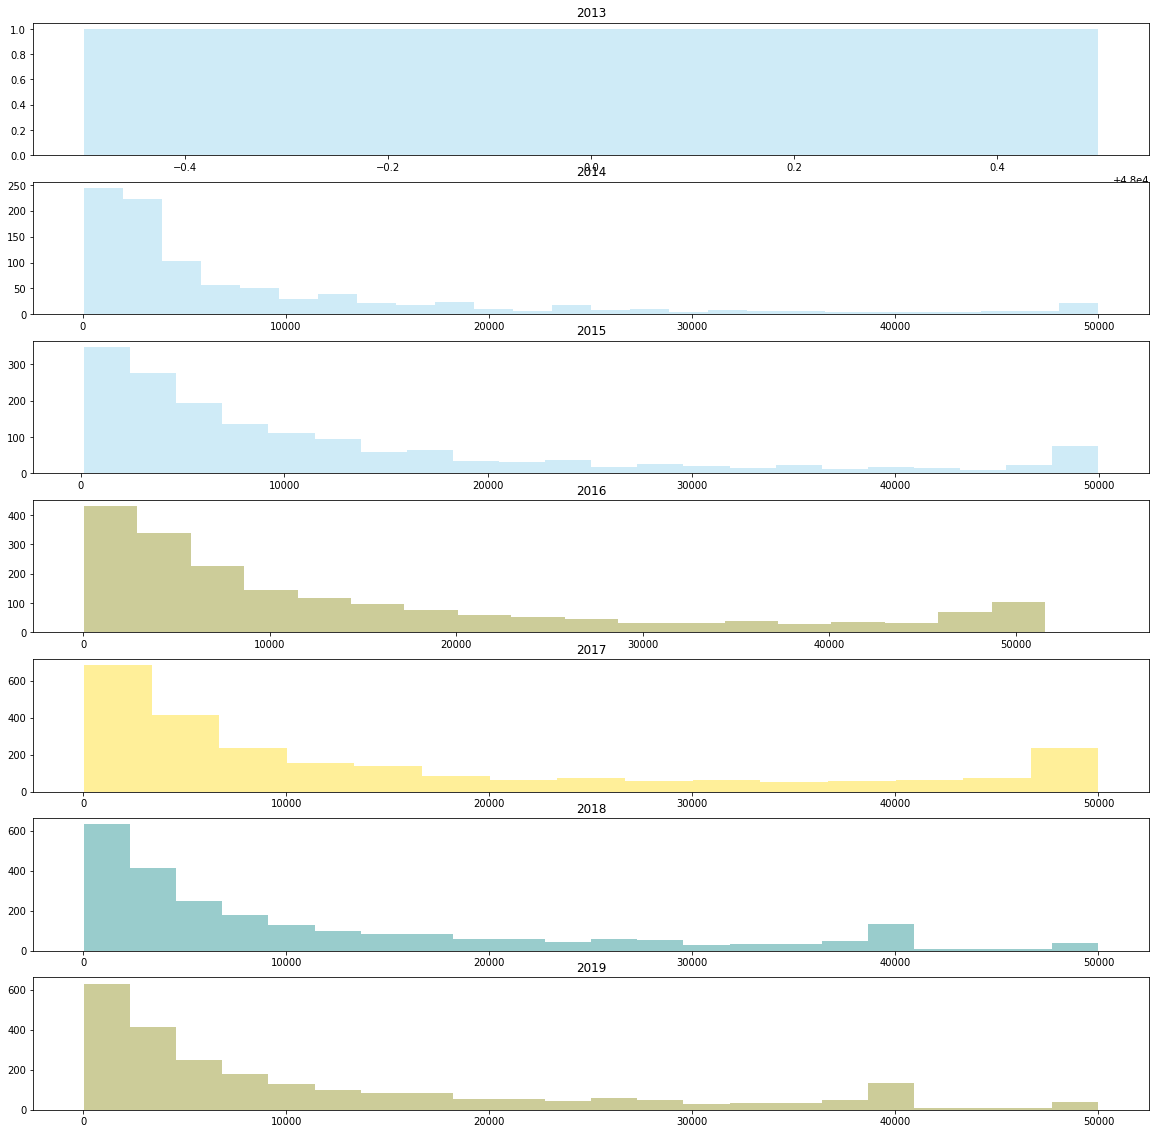

In [20]:
f, axes = plt.subplots(7,1, figsize=(20, 20));
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2013']['import_adjudicacio'] , color="skyblue", ax=axes[0], kde = False, axlabel = False)
axes[0].set_title("2013")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2014']['import_adjudicacio'] , color="skyblue", ax=axes[1], kde = False, axlabel = False)
axes[1].set_title("2014")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2015']['import_adjudicacio'] , color="skyblue", ax=axes[2], kde = False, axlabel = False)
axes[2].set_title("2015")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2016']['import_adjudicacio'] , color="olive", ax=axes[3], kde = False, axlabel = False)
axes[3].set_title("2016")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2017']['import_adjudicacio'] , color="gold", ax=axes[4], kde = False, axlabel = False)
axes[4].set_title("2017")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2018']['import_adjudicacio'] , color="teal", ax=axes[5], kde = False, axlabel = False)
axes[5].set_title("2018")
sns.distplot(  df_obres.loc[df_obres['exercici'] == '2018']['import_adjudicacio'] , color="olive", ax=axes[6], kde = False, axlabel = False)
axes[6].set_title("2019")

#f.show()

És curiós que l'import d'adjudicació augmenta quan s'apropa al límit dels 50K€ en tots els anys amb dates, excepte al 2018 que amb el canvi de llei també apareix un augment dels contractes de 40K€.

In [7]:
df.loc[df['adjudicatari'] == 'Pavimentos y']

,adjudicatari,agrupacio_organisme,anys_durada,codi_cpv,codi_expedient,contracte,data_adjudicacio,descripcio_expedient,dies_durada,exercici,import_adjudicacio,lot_desert,mesos_durada,numero_lot,organisme_contractant,procediment_adjudicacio,subjecte_ambit,tipus_contracte
7417,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2016-1073,"08040540,I.El Cairat,Esparreguera,arranjament ...",2016-11-10,"08040540,I.El Cairat,Esparreguera,arranjament ...",7,2016,1895.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
7565,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2017-1409,"08040540,I.El Cairat,Esparreguera,arranjament ...",2017-10-10,"08040540,I.El Cairat,Esparreguera,arranjament ...",7,2017,1750.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
12463,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-132,"08015961,E.Jacint Verdaguer,Castelldefels, ins...",2017-02-17,"08015961,E.Jacint Verdaguer,Castelldefels, ins...",28,2017,7272.35,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
16385,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-1230,"E.Pau Vila, Esparreguera, arranj.canals recoll...",2017-07-27,"E.Pau Vila, Esparreguera, arranj.canals recoll...",61,2017,37700.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
33726,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-316,"08043401,E.Barrufet,St.Boi Llobregat,reparació...",2017-03-22,"08043401,E.Barrufet,St.Boi Llobregat,reparació...",30,2017,6100.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
40648,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2015-89,"08025344,E.Amat Verdú,St.Boi Llobregat, repara...",2015-02-26,"08025344,E.Amat Verdú,St.Boi Llobregat, repara...",32,2015,20125.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
40838,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2016-330,"08044247,E.Estel, Molins de Rei, reparació jar...",2016-04-28,"08044247,E.Estel, Molins de Rei, reparació jar...",123,2016,7780.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
45671,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45000000-7,ED-2017-1099,"08016410,E.Sant Ildefons,Cornellà Llob, adequa...",2017-07-17,"08016410,E.Sant Ildefons,Cornellà Llob, adequa...",62,2017,42876.48,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
48760,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2017-1232,"08014814 E. El Bruc, El Bruc, Adequació aula",2017-07-28,"08014814 E. El Bruc, El Bruc, Adequació aula",31,2017,4130.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES
54201,Pavimentos y,DEPARTAMENT D'EDUCACIÓ,0,45259000-7,ED-2017-802,"08033985,I.Sant Just,St.Just Desvern,substituc...",2017-06-15,"08033985,I.Sant Just,St.Just Desvern,substituc...",62,2017,29890.00,N,0,1,Departament d'Educació,Menor,Departaments i Sector Públic de la Generalitat...,OBRES


In [10]:
df_obres.groupby(['adjudicatari', 'exercici', 'agrupacio_organisme']).agg(['count', 'sum'])

anys_durada  \
                                                                                                                     count   
adjudicatari                                       exercici agrupacio_organisme                                              
"FORMA FUSTA" Miquel Fargas Valero                 2014     DEPARTAMENT DE CULTURA                                       1   
- Construesfera, S.L.                              2017     DEPARTAMENT DE CULTURA                                       1   
10 GAS INSTALACIONES SLU                           2016     DEPARTAMENT DE CULTURA                                       1   
1953 GRUP SOLER CONSTRUCTORA, S.L.                 2018     DEPARTAMENT DE SALUT                                         3   
                                                            DEPARTAMENT DE TERRITORI I SOSTENIBILITAT                    1   
                                                   2019     DEPARTAMENT DE TERRITORI I SOSTENIBILITAT                    1   
1953 GRUP SOLER CONSTRUCTORA, SL                   2017     DEPARTAMENT DE TERRITORI I SOSTENIBILITAT                    1   
                                                   2018     DEPARTAMENT DE JUSTÍCIA                                      1   
                                                            DEPARTAMENT DE TERRITORI I SOSTENIBILITAT                    1   
1953GRUP SOLER CONSTRUCTORA, AL                    2014     DEPARTAMENT DE CULTURA                                       1   
                                                   2016     DEPARTAMENT D'EDUCACIÓ                                       1   
1987 ALBAÑILERIA GONZALEZ SL                       2019     DEPARTAMENT DE SALUT                                         1   
3RH PONENT SL                                      2015     DEPARTAMENT D'EDUCACIÓ                                       1   
                                                   2016     DEPARTAMENT D'EDUCACIÓ                                       8   
                                                   2017     DEPARTAMENT D'EDUCACIÓ                                       1   
                                                   2018     DEPARTAMENT D'EDUCACIÓ                                       4   
9 TEAM GRUP CONSTRUCTOR                            2016     DEPARTAMENT D'EDUCACIÓ                                       2   
                                                   2018     DEPARTAMENT D'EDUCACIÓ                                       1   
A+D SERVEIS                                        2016     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             1   
A. SALA TALLERES METÁLICOS, SA                     2016     DEPARTAMENT DE LA VICEPRESIDÈNCIA, I D'ECONOMIA...           3   
A.J. INGENIERIA,                                   2014     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             2   
                                                   2016     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             2   
A.P. SISTEMES ELECTRÒNICS, SC                      2014     DEPARTAMENT D'EDUCACIÓ                                       1   
AARON EDUARDO SPIVAK EPSTEIN                       2017     DEPARTAMENT D'EDUCACIÓ                                       1   
AB Aucatel Inspección y Control, SLU               2017     DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES             1   
ABAC, CONSERVACIÓ                                  2017     DEPARTAMENT DE CULTURA                                       1   
ABANS Serveix Culturals, SL                        2016     DEPARTAMENT DE CULTURA                                       1   
ABANTIA INSTALACIONES, SA, Sociedad Unipersonal    2014     DEPARTAMENT DE SALUT                                         5   
                                                   2015     DEPARTAMENT DE SALUT                                         1   
ABANTIA MANTENIMIENTO,                             2015     DEPARTAMENT DE TREB

In [11]:
df_gestio = df.loc[(df['tipus_contracte'].isin(['GESTIÓ DE SERVEI PÚBLIC']))]
df_subministraments = df.loc[(df['tipus_contracte'].isin(['SUBMINISTRAMENTS']))]
df_serveis = df.loc[(df['tipus_contracte'].isin(['SERVEIS']))]
df_administratiu_especial = df.loc[(df['tipus_contracte'].isin(['ADMINISTRATIU ESPECIAL']))]



In [12]:
df.sort_values(by = 'import_adjudicacio', ascending = False).head()

,adjudicatari,agrupacio_organisme,anys_durada,codi_cpv,codi_expedient,contracte,data_adjudicacio,descripcio_expedient,dies_durada,exercici,import_adjudicacio,lot_desert,mesos_durada,numero_lot,organisme_contractant,procediment_adjudicacio,subjecte_ambit,tipus_contracte
78505,Consorci de la Zona Franca de Barcelona,DEPARTAMENT D'EMPRESA I CONEIXEMENT,3,70310000-7,16/13,Arrendament dels despatxos i places d'aparcame...,2016-02-01,Arrendament dels despatxos i places d'aparcame...,0,2016,369128.52,N,0,1,Consorci de Serveis Universitaris de Catalunya...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS
6193,"FERSIX SERIGRAFIA, SL",DEPARTAMENT DE TERRITORI I SOSTENIBILITAT,1,71900000-7,CTN1400425,SUBMINISTRAMENT DE DIFERENT MATERIAL D'EQUIPS ...,2014-07-21,SUBMINISTRAMENT DE DIFERENT MATERIAL D'EQUIPS ...,0,2014,279906.00,N,0,1,Agència Catalana de l'Aigua,Menor,Departaments i Sector Públic de la Generalitat...,SUBMINISTRAMENTS
268074,"GARTNER ESPAÑA, SL",DEPARTAMENT DE LA PRESIDÈNCIA,0,48614000-5,CTTI-2018-169,Subscripció a les bases de dades especialitzad...,2018-09-25,Subscripció a les bases de dades especialitzad...,365,2018,216600.00,N,0,1,Centre de Telecomunicacions i Tecnologies de l...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS
93763,"GARTNER ESPAÑA, SL",DEPARTAMENT DE LA PRESIDÈNCIA,0,48810000-9,CTTI-2015-343,Subscripció a les bases de dades de coneixemen...,2016-01-15,Subscripció a les bases de dades de coneixemen...,336,2016,206990.00,N,0,1,Centre de Telecomunicacions i Tecnologies de l...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS
125679,"GARTNER ESPAÑA, SL",DEPARTAMENT DE LA PRESIDÈNCIA,0,48810000-9,CTTI-2016-207,Subscripció a les bases de dades de coneixemen...,2016-10-10,Subscripció a les bases de dades de coneixemen...,365,2016,206990.00,N,0,1,Centre de Telecomunicacions i Tecnologies de l...,Menor,Departaments i Sector Públic de la Generalitat...,SERVEIS


In [13]:
#df[['tipus_contracte', ]].groupby(['tipus_contracte']).agg(['count'])

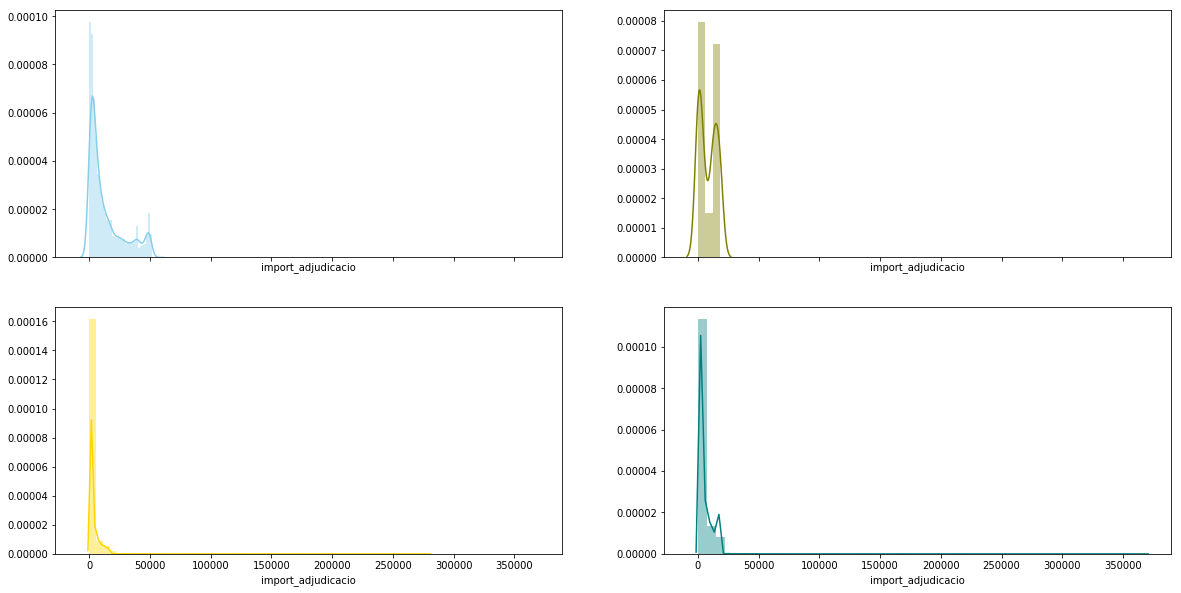

In [14]:
f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
sns.distplot( df_obres['import_adjudicacio'] , color="skyblue", ax=axes[0, 0])
sns.distplot( df_gestio['import_adjudicacio'] , color="olive", ax=axes[0, 1])
sns.distplot( df_subministraments['import_adjudicacio'] , color="gold", ax=axes[1, 0])
sns.distplot( df_serveis['import_adjudicacio'] , color="teal", ax=axes[1, 1])

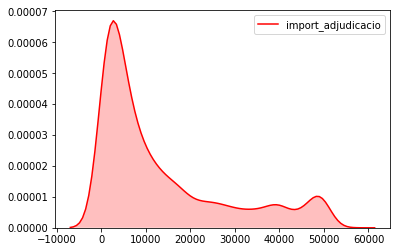

In [15]:
# plot of 2 variables
p1=sns.kdeplot(df_obres['import_adjudicacio'], shade=True, color="r")
#sns.plt.show()

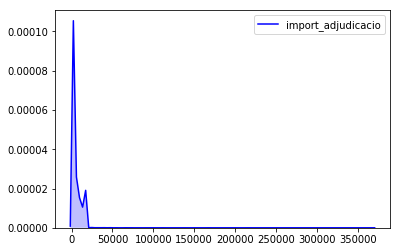

In [16]:
p1=sns.kdeplot(df_serveis['import_adjudicacio'], shade=True, color="b")


In [17]:
df[['adjudicatari','agrupacio_organisme']]

,adjudicatari,agrupacio_organisme
0,TAKEDA FARMACEUTICA ESPAÑA S.A. UNIPERSONAL,DEPARTAMENT DE SALUT
1,"SANOFI-AVENTIS, SA",DEPARTAMENT DE SALUT
2,"ABBOTT LABORATORIES, SA",DEPARTAMENT DE SALUT
3,"MUNDIPHARMA PHARMACEUTICALS, SL",DEPARTAMENT DE SALUT
4,"MUNDIGAS,S.L.",DEPARTAMENT DE TERRITORI I SOSTENIBILITAT
5,"SMITH & NEPHEW, SA Societat Unipersonal",DEPARTAMENT DE SALUT
6,JOSEFINA PUIG GUBIANES,DEPARTAMENT DE SALUT
7,TEB FUNDACIÓ PEL TREBALL SOCIAL AMB LES TIC,"DEPARTAMENT DE TREBALL, AFERS SOCIALS I FAMILIES"
8,"OBRES COM9, SL","DEPARTAMENT D'AGRICULTURA, RAMADERIA, PESCA, A..."
9,"S&T 96, SL",DEPARTAMENT D'EMPRESA I CONEIXEMENT


In [18]:
comptador_totals = df_obres['adjudicatari'].value_counts()
for empresa in comptador_totals.items():
    print(empresa)

('SERVEIS OBRES I MANTENIMENT, SL', 190)
('SERPA 2009 SL', 117)
('FOMENTO DE CONSTRUCCIONES Y CONTRATAS SA', 86)
('LOAL - LA INSTALADORA DEL VALLÉS,SL', 72)
('TECNICAS DE', 70)
('CONSTRUCCIONS BUSQUETS', 65)
('SPARK IBERICA, S.A.', 57)
('Sr. JUAN CARLOS GOMEZ FERNANDEZ', 56)
('PROYECTOS  Y LEGALIZACIONES INGESPA SL', 50)
('CLECE, SA', 49)
('SERVICIOS GESTION', 47)
('METRO 7 SL', 44)
('SOGESA INSTALACIONES INTEGRALES, SA, Sociedad Unipersonal', 44)
('SERVIOBRES QUERALT SL', 44)
('OBRES I REFORMES DAYSON, SL', 42)
('CONSTRUCTORA COLUMBA, SL', 41)
('JAUME PARERA CAPIN, SL', 40)
('IAMASSERVEIS, SL', 39)
('SOLER GLOBAL SERVICE, SL', 39)
('CONSTRUCCIONS MAXI DEL VALLÈS,S.L.', 39)
('VILLA-REYES, SL INDUSTRIAL CONSTRUCTORA', 38)
('CONSERVACION DE VIAS SAINZ, SA', 36)
('CONSTRUCCIONS P. ROCA, SA', 36)
('TESLA INDUSTRIAL,', 34)
('PLURIAMBIENT 2002', 33)
('CONSTRUDOSA SL', 33)
('MANUSA DOOR SYSTEMS, SL SOCIETAT UNIPERSONAL', 32)
('CONSTRUBA PROYECTOS Y EDIFICACIONES SL', 32)
('DIVISA BARCELONA, S